In [3]:
# I. Выберите два алгоритма (интересных вам и не рассмотренных в курсе) из
# вышеперечисленных разделов книги.
# II. Проанализируйте выбранные алгоритмы с точки зрения временной и пространственной сложности,
# используемых методов проектирования и т.д. Реализуйте алгоритмы и проведите несколько экспериментов.
# Проанализируйте результаты

!pip install igraph cairocffi

In [73]:
from collections import namedtuple
import igraph as ig

Edge = namedtuple('Edge', 'weight start end')


class DisjointSet:
    def __init__(self, key):
        self.key = key
        self.parent = self
        self.rank = 0

    def find_root(self):
        if self.parent is not self:
            self.parent = self.parent.find_root()
        return self.parent

    def union(self, other):
        x = self.find_root()
        y = other.find_root()
        if x is y:  # They're in the same set already
            return
        if x.rank < y.rank:
            x.parent = y
        elif x.rank > y.rank:
            y.parent = x
        else:
            y.parent = x
            x.rank += 1


def kruskal(nodes, edges):
    """Given a graph, yield the edges in its minimum spanning tree."""
    forest = dict((n, DisjointSet(n)) for n in nodes)
    for edge in sorted(edges):
        x = forest[edge.start].find_root()
        y = forest[edge.end].find_root()
        if x is not y:
            yield edge
            x.union(y)


test_nodes = 'ABCDEFG'
test_edges = '''
7 A B
5 A D
8 B C
9 B D
7 B E
5 C E
15 D E
6 D F
8 E F
9 E G
11 F G
'''.strip()


def parse_edge_data(s):
    for line in s.split('\n'):
        weight, start, end = line.split()
        yield Edge(int(weight), start, end)


def main():
    for edge in kruskal(test_nodes, parse_edge_data(test_edges)):
        print(edge)


main()

Edge(weight=5, start='A', end='D')
Edge(weight=5, start='C', end='E')
Edge(weight=6, start='D', end='F')
Edge(weight=7, start='A', end='B')
Edge(weight=7, start='B', end='E')
Edge(weight=9, start='E', end='G')


In [5]:
#Bapartite matching 

In [6]:
class Edge:
    def __init__(self) -> None:
        self.defaultEdgeCapacity = 1
        self.fromVertex = None
        self.toVertex = None
        self.capacity = None
        self.flow = None
    def get_end_node(self, vertex):
        if vertex==self.fromVertex:
            return self.toVertex
        return self.fromVertex
    def get_residual_capacity_to(self, vertex):
        if vertex== self.fromVertex:
            return self.flow
        return (self.capacity-self.flow)

    def increase_flow_to(self, vertex, changeInFlow):
        if vertex==self.fromVertex :
            self.flow = self.flow-changeInFlow
        else:
            self.flow = self.flow+changeInFlow
		
    


In [7]:

from collections import defaultdict
 
class Graph:
 
    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)
 
    '''Returns true if there is a path from source 's' to sink 't' in
    residual graph. Also fills parent[] to store the path '''
 
    def BFS(self, s, t, parent):
 
        visited = [False]*(self.ROW)
 
        queue = []
 
        queue.append(s)
        visited[s] = True
 
        while queue:
 
            u = queue.pop(0)
 
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:

                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True
 
        return False
             
    
    def FordFulkerson(self, source, sink):
        parent = [-1]*(self.ROW)
 
        max_flow = 0
 
        while self.BFS(source, sink, parent) :
 
            # Find minimum residual capacity of the edges along the
            # path filled by BFS. Or we can say find the maximum flow
            # through the path found.
            path_flow = float("Inf")
            s = sink
            while(s !=  source):
                path_flow = min (path_flow, self.graph[parent[s]][s])
                s = parent[s]
 
            max_flow +=  path_flow
 
            v = sink
            while(v !=  source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
 
        return max_flow
 
  
# Create a graph given in the above diagram
 
graph = adj_matrix[]
 
g = Graph(graph)
 
source = 0; sink = 5


print ("The maximum possible flow is %d " % g.FordFulkerson(source, sink))
 
# This code is contributed by Neelam Yadav

The maximum possible flow is 23 


In [8]:
import numpy as np

In [18]:
def get_weights(adj_matrix):
  for i in range(len(adj_matrix)):
    for j in range(len(adj_matrix)):
      if i == j:
        adj_matrix[i][j] = 0
        continue
      elif adj_matrix[i][j] == 0:
        adj_matrix[i][j] = np.iinfo(np.int32).max  
        adj_matrix[j][i] = np.iinfo(np.int32).max  
        continue
      else:
        distance = np.random.randint(1, 1000)
        adj_matrix[i][j] = distance
        adj_matrix[j][i] = distance
  return adj_matrix

In [26]:
import time

In [87]:
ford_falk_time_track = []
for x in range(10, 100):
  track = []
  for _ in range(5):
    g = ig.Graph.Erdos_Renyi(n=x, m=x//2)
    layout = g.layout_drl()
    #ig.plot(g, "graph.png")
    adj_matrix = np.array(g.get_adjacency().data)
    adj_matrix = get_weights(adj_matrix)
    g = Graph(adj_matrix)
    source = np.random.randint(0, x); sink = np.random.randint(0, x)
    start = time.time()
    g.FordFulkerson(source, sink)
    end = time.time()
    track.append(end - start)
  ford_falk_time_track.append(np.mean(track))
  print(x)

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [43]:
g = ig.Graph.Erdos_Renyi(n=x, m=x//2)
layout = g.layout_drl()
#ig.plot(g, "graph.png")
adj_matrix = np.array(g.get_adjacency().data)
#adj_matrix = get_weights(adj_matrix)

In [48]:
adj_matrix = np.array(g.get_adjacency().data)

In [ ]:
adj_matrix = adj_matrix.tolist()

In [50]:
g = ig.Graph.Erdos_Renyi(n=100, m=500)
layout = g.layout_drl()

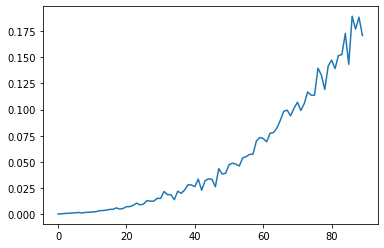

In [56]:
plt.plot(list(range(90)), time_track)

In [58]:
import networkx as nx

In [68]:
matrix = list(matrix)

In [ ]:
matrix

In [76]:
kraskal_tracks = []

In [94]:
def parse_edge_data(s):
    for line in matrix:
        start, end, weight = line
        yield Edge(int(weight), start, end)


def main():
    for x in range(30, 100):
      track = []
      for _ in range(5):

        g = ig.Graph.Erdos_Renyi(n=x, m=x)
        layout = g.layout_drl()


        adj_matrix = np.array(g.get_adjacency().data)
        adj_matrix = get_weights(adj_matrix)
        G = nx.from_numpy_matrix(adj_matrix)
        matrix = set()
        adj_matrix = dict(G.adjacency())

        for v in adj_matrix:
          inner_matrix = adj_matrix[v]
          for w in inner_matrix:
            if (v, w, inner_matrix[w]['weight']) not in matrix and (v, w, inner_matrix[w]['weight']) not in matrix:
              matrix.add((v, w, inner_matrix[w]['weight']))   
    
        list(kruskal(list(G.nodes), parse_edge_data(matrix)))
        end = time.time()
      track.append(end - start)
    time_track.append(np.mean(track))

main()

KeyError: ignored

In [ ]:
kraskal_time_track = []

In [103]:
time_track = []

In [105]:
for x in range(30, 100):
  track = []
  for _ in range(5):

    g = ig.Graph.Erdos_Renyi(n=x, m=x)
    layout = g.layout_drl()

    adj_matrix = np.array(g.get_adjacency().data)
    adj_matrix = get_weights(adj_matrix)
    G = nx.from_numpy_matrix(adj_matrix)
    matrix = set()
    adj_matrix = dict(G.adjacency())

    for v in adj_matrix:
      inner_matrix = adj_matrix[v]
      for w in inner_matrix:
        if (v, w, inner_matrix[w]['weight']) not in matrix and (v, w, inner_matrix[w]['weight']) not in matrix:
          matrix.add((v, w, inner_matrix[w]['weight']))   
    start = time.time()
    list(kruskal(list(G.nodes), parse_edge_data(matrix)))
    end = time.time()
    track.append(end - start)
  time_track.append(np.mean(track))

In [38]:
from matplotlib import pyplot as plt
import numpy as np

In [107]:
len(time_track)

109

In [111]:
time_track_test = time_track[39:]

In [101]:
len(ford_falk_time_track)

90

In [112]:
len(time_track_test)

70

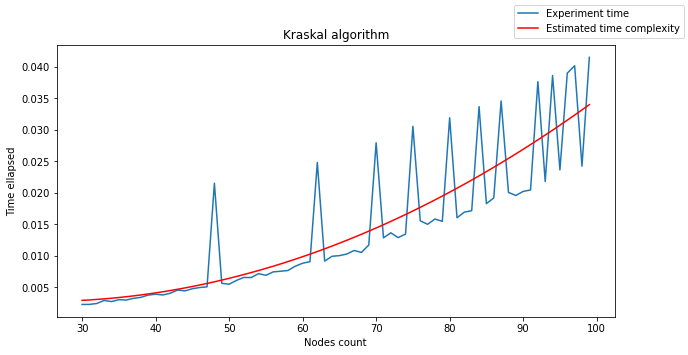

In [113]:
algorithm = 'Kraskal algorithm'
time_ellapsed = time_track_test
fig, ax = plt.subplots(figsize=(10, 5))
theoretical_complexity = 'Estimated time complexity'
x_values = np.array(range(30, 100))
n, m, b = np.polyfit(x_values, time_ellapsed, 2)

ax.plot(x_values, time_ellapsed, '-', label = 'Experiment time')
ax.set_title(algorithm)
ax.set_xlabel('Nodes count')
ax.set_ylabel('Time ellapsed')
ax.plot(x_values, np.array(x_values)** 2* n + m * np.array(x_values) + b, '-r', label = f'{theoretical_complexity}')
fig.legend()

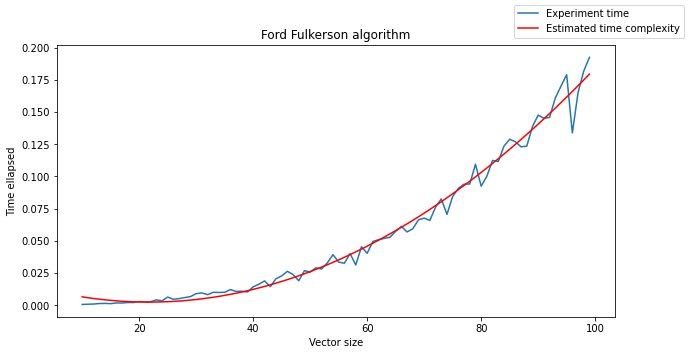

In [93]:
time_ellapsed = ford_falk_time_track
algorithm = 'Ford Fulkerson algorithm'
fig, ax = plt.subplots(figsize=(10, 5))
theoretical_complexity = 'Estimated time complexity'
x_values = np.array(range(10, 100))
n, m, b = np.polyfit(x_values, time_ellapsed, 2)

ax.plot(x_values, time_ellapsed, '-', label = 'Experiment time')
ax.set_title(algorithm)
ax.set_xlabel('Nodes count')
ax.set_ylabel('Time ellapsed')
ax.plot(x_values, np.array(x_values)** 2* n + m * np.array(x_values) + b, '-r', label = f'{theoretical_complexity}')
fig.legend()